In [810]:
import pandas as pd
from math import log
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# OVERVIEW


The aim of the project is to develop a predictive model that predicts final prices of homes. This project is a submission for Kaggle House prices competition and Turing College to demostrate my knowledge of python and Machine Learning. 

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

# GOALS and METRICS


The goal is to predict the sales price for each house. For each Id in the test set, the value of SalePrice variable must be predicted. The predicted values for test is evaluated using Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. 

In [811]:
def evaluation_metric(predicted_value, actual_value) -> float:
    '''
        Evaluation of predicted result against actual result using RMSE 
        between the logarithm of the predicted value and logarithm of observed value

        Parameters
            ----------
            Predicted value : array
                the predicted value from the model

            actual value: array
                the actual observed value

            Returns
            -------
            float
                root mean square error between the logarithm of the predicted value and logarithm of actual value

    '''
    rmse = mean_squared_error(log(actual_value),log(predicted_value), squared=False)
    return rmse

# EXPLORATION

In [812]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [813]:
def verify_remodelling(remodelled_year, built_year):
    '''
        Compute if remodelling has been done on a house

        Parameters
            ----------
            remodelled_year : int
                the year remodel was done on the house

            built_year: int
                the year the house was built

            Returns
            -------
            bool
                returns True if remodel was done, False for None and -1 if discrepancy with the values
    '''
    if remodelled_year > built_year:
        return True
    elif remodelled_year == built_year:
        return False
    else:
        return -1

In [814]:
''' 
    Ordinal Ranking Meaning

    Ex	Excellent
    Gd	Good
    TA	Typical/Average
    Fa	Fair
    Po	Poor

'''
ms_sub_class = {20:'1-STORY 1946 & NEWER ALL STYLES', 30:'1-STORY 1945 & OLDER', 40:'1-STORY W/FINISHED ATTIC ALL AGES',50:'1-1/2 STORY FINISHED ALL AGES',
                60: '2-STORY 1946 & NEWER', 70: '2-STORY 1945 & OLDER', 75:'2-1/2 STORY ALL AGES', 80:'SPLIT OR MULTI-LEVEL', 85:'SPLIT FOYER',
                90: 'DUPLEX - ALL STYLES AND AGES', 120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 150:'1-1/2 STORY PUD - ALL AGES',
                160:'2-STORY PUD - 1946 & NEWER', 180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}

ordinal_ranking = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, 'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'Reg':3, 'IR1':2, 'IR2':1,'IR3':0,'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 
            'ELO':1, 'Gtl':3, 'Mod':2, 'Sev':1, 'Av':3, 'Mn':2, 'No':1, 'GLQ':5, 'ALQ':4, 'BLQ':3, 'Rec':2, 'LwQ':1, 'Unf':-1, 'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5,
            'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1, 'Fin':2, 'RFn':1}

continious_features =['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea',
                      'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal']
norminal_features = ['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig','Neighborhood','Condition1','Condition2', 'BldgType','HouseStyle','RoofStyle', 'RoofMatl'
                    'Exterior1st','Exterior2nd', 'MasVnrType','Foundation','Heating','CentralAir','GarageType','GarageYrBlt','PavedDrive', 'MiscFeature','SaleType',
                    'SaleCondition','Electrical']
discrete_features = ['YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
                     'MoSold', 'YrSold']
ordinal_cat_features = ['LotShape', 'Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC'
                        ,'KitchenQual', 'Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence']
ordinal_num_features = ['OverallQual','OverallCond' ]

It can be seen below that both test and train dataset have missing values. 

In [815]:
train_set.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [816]:
test_set.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

## Ordinal Features
For Ordinal categorical features, missing values will be filled with NA (0)

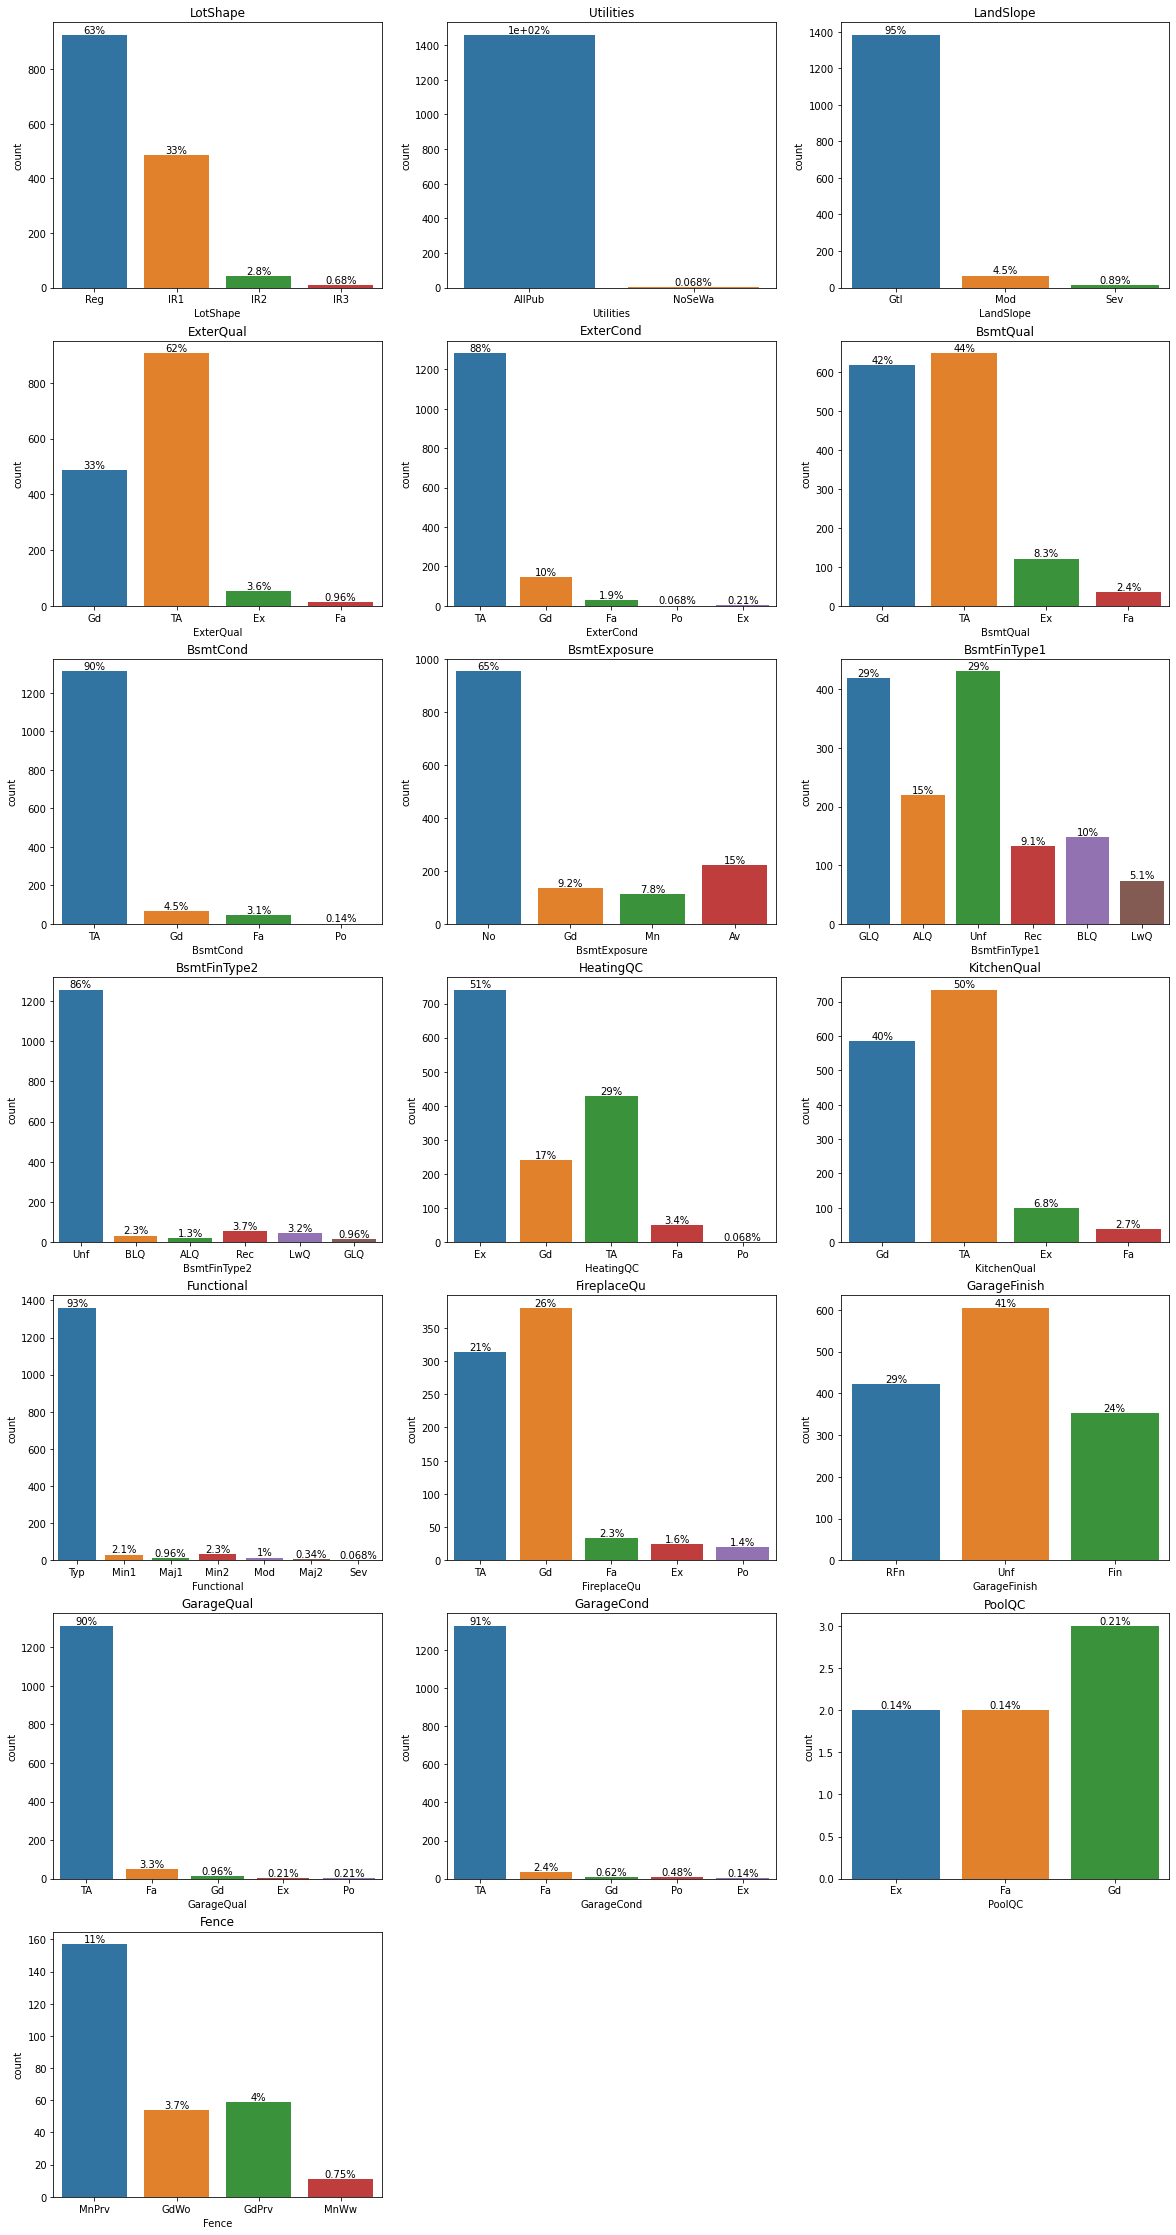

In [817]:
n_rows = 7
n_cols = 3
counter = 1

fig = plt.figure(figsize=(20,40))
for col in ordinal_cat_features:
    plt.subplot(n_rows, n_cols, counter)
    plt.title('{}'.format(col))
    plt.xlabel(col)
    g = sns.countplot(train_set[col])
    for p in g.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        g.annotate('{:.2g}%'.format(100.*y/len(train_set[col])), (x.mean(), y), ha='center', va='bottom')
    counter += 1

plt.show();

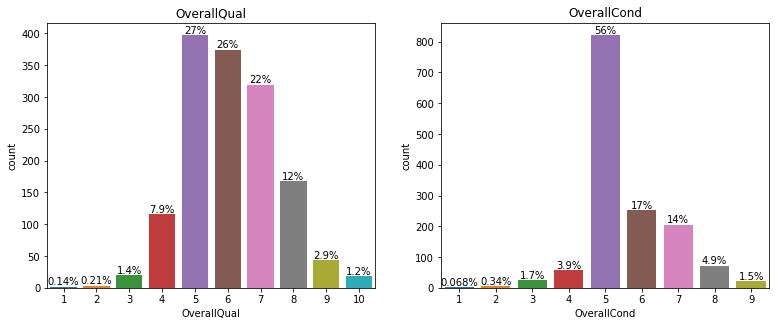

In [836]:
fig = plt.figure(figsize=(20,40))
for col in ordinal_num_features:
    plt.subplot(n_rows, n_cols, counter)
    plt.title('{}'.format(col))
    plt.xlabel(col)
    g = sns.countplot(train_set[col])
    for p in g.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        g.annotate('{:.2g}%'.format(100.*y/len(train_set[col])), (x.mean(), y), ha='center', va='bottom')
    counter += 1

plt.show();

In [818]:
for col in ordinal_cat_features:
    train_set[col] = train_set[col].map(ordinal_ranking)
    test_set[col] = test_set[col].map(ordinal_ranking)
    train_set[col] = train_set[col].fillna(0)
    test_set[col] = test_set[col].fillna(0)

## MS SubClass (Nominal): Identifies the type of dwelling involved in the sale
The highest number of house type in the dataset is 1-STORY 1946 & NEWER ALL STYLES

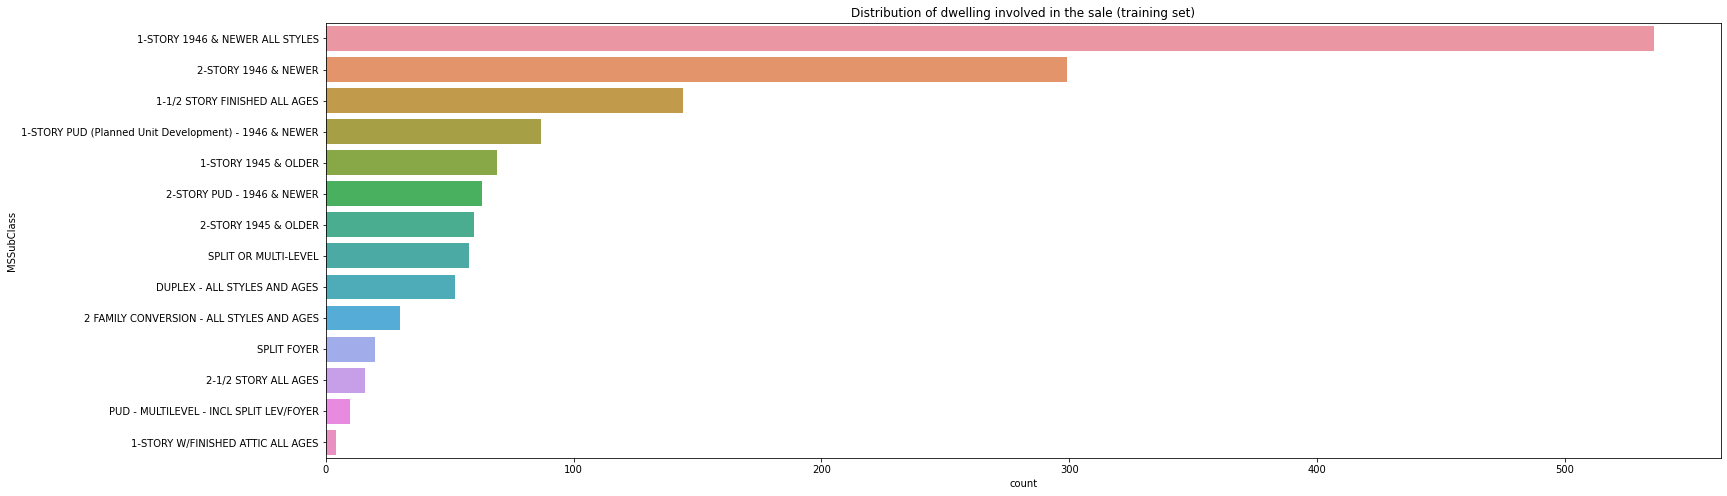

In [732]:
plt.figure(figsize=(25,8))

ax = sns.countplot(y=train_set.MSSubClass.map(ms_sub_class), order=train_set.MSSubClass.map(ms_sub_class).value_counts().index)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title('Distribution of dwelling involved in the sale (training set)')
plt.show();


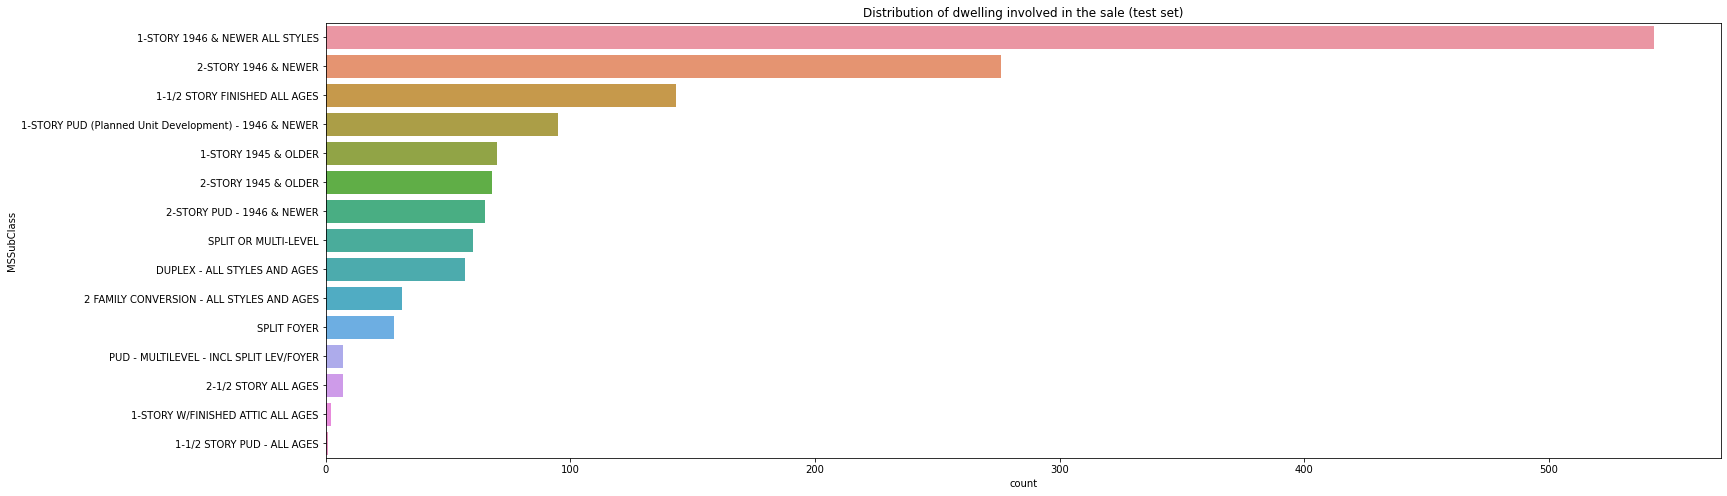

In [819]:
plt.figure(figsize=(25,8))
ax = sns.countplot(y=test_set.MSSubClass.map(ms_sub_class), order=test_set.MSSubClass.map(ms_sub_class).value_counts().index)
plt.title('Distribution of dwelling involved in the sale (test set)')
plt.show();

## MS Zoning (Nominal): Identifies the general zoning classification of the sale.
The testset has 4 null values and are replaced with the modevalue

In [820]:
test_set['MSZoning'].isnull().sum()

4

In [821]:
test_set['MSZoning'].mode()

0    RL
dtype: object

In [822]:
test_set['MSZoning'] = test_set['MSZoning'].fillna('RL')

## jus

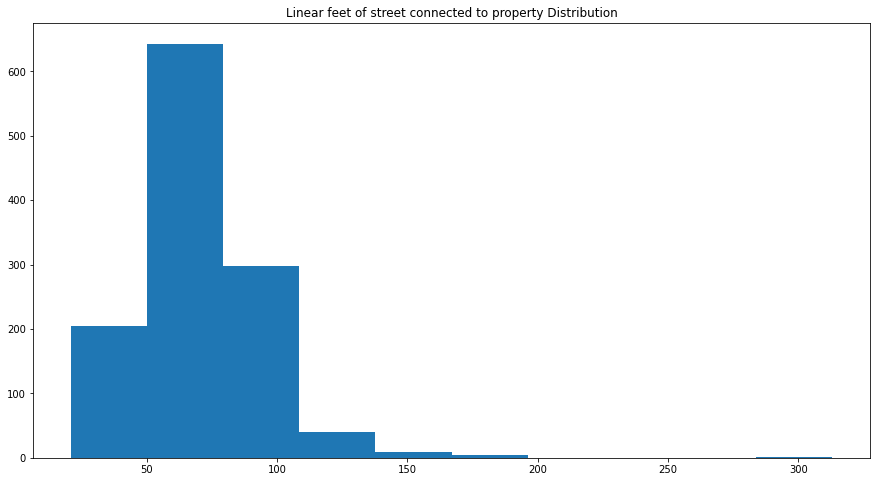

In [823]:
plt.figure(figsize=(15,8))
plt.hist(train_set['LotFrontage'])
plt.title("Linear feet of street connected to property Distribution");

In [824]:
train_set[train_set['LotFrontage'] > 250]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,1,HLS,4,...,0,0.0,0.0,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,0,Bnk,4,...,480,4.0,0.0,NaN,0,1,2008,New,Partial,160000


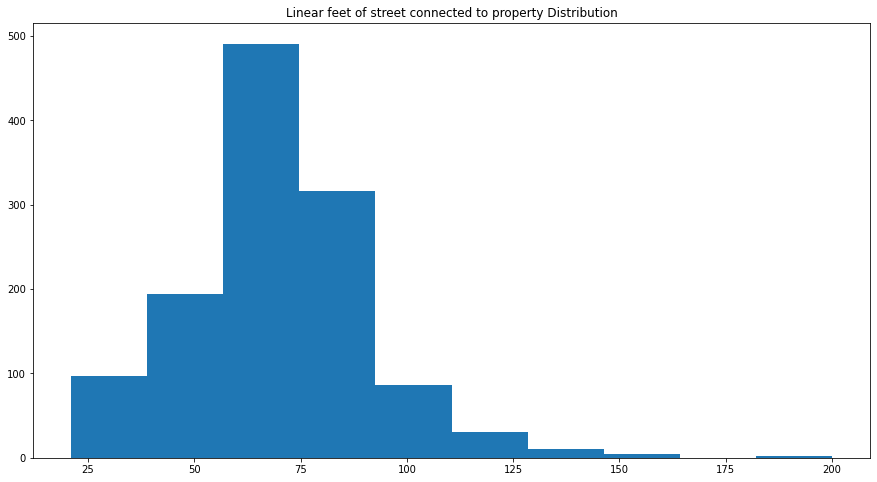

In [825]:
plt.figure(figsize=(15,8))
plt.hist(test_set['LotFrontage'])
plt.title("Linear feet of street connected to property Distribution");

In [826]:
train_set[train_set['LotFrontage'] > 175]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,1,HLS,4,...,0,0.0,0.0,NaN,0,11,2008,WD,Normal,242000
1127,1128,20,RL,182.0,14572,Pave,NaN,0,Lvl,4,...,0,0.0,0.0,NaN,0,11,2007,WD,Family,259000
1298,1299,60,RL,313.0,63887,Pave,NaN,0,Bnk,4,...,480,4.0,0.0,NaN,0,1,2008,New,Partial,160000


In [827]:
train_set['LotFrontage'].isnull().sum()

259

In [828]:
test_set['LotFrontage'].isnull().sum()

227

# FEATURE ANALYSIS

In [829]:
#Correlation of continiuos features to salesPrice

In [830]:
train_set[['GrLivArea','SalePrice']]

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
...,...,...
1455,1647,175000
1456,2073,210000
1457,2340,266500
1458,1078,142125


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

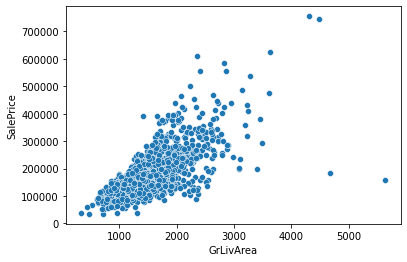

In [831]:
sns.scatterplot(data=train_set, x = 'GrLivArea', y='SalePrice')

In [832]:
train_set['total_square_footage'] = train_set['TotalBsmtSF'] + train_set['GrLivArea']
test_set['total_square_footage'] = test_set['TotalBsmtSF'] + test_set['GrLivArea']

In [833]:
train_set.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [834]:
train_set['remodelling_done'] = train_set.apply(lambda x: verify_remodelling(x['YearRemodAdd'], x['YearBuilt']), axis=1)
test_set['remodelling_done'] = test_set.apply(lambda x: verify_remodelling(x['YearRemodAdd'], x['YearBuilt']), axis=1)

In [835]:
#total_area_of_house = basement+firstfloor+second floor
train_set['total_area_of_house'] = train_set['TotalBsmtSF'] + train_set['1stFlrSF'] + train_set['2ndFlrSF']

# MODELLING

## LINEAR REGRESSION MODEL

## RANDOM FOREST MODEL

## ENSEMBLE

## MODEL EVALUATION

# CONCLUSION